In [127]:
from moralis import evm_api
import os
import json
import requests
from PIL import Image
from io import BytesIO

In [135]:
from get_embeddings import get_single_image_embedding, get_model_info

GETTING ENVIRONMENTAL VARIABLES

In [ ]:
moralis_api_key = os.getenv('MORALIS_API_KEY')
pinecone_api_key = os.getenv('PINECONE_API_KEY')

In [ ]:
# Wallet address of User I'm using to test
account_address = "0x9966CfE397CeA90D81e1E45F35Fee4723C2dAe6E"

GETTING RECENT NFT PURCHASE

In [99]:
def get_wallet_nft_transfers(account_address, limit):
  # Parameters required by the get_wallet_nft_transfers endpoint
  params = {
    "chain": "eth",
    "format": "decimal",
    "order": "DESC",
    "limit": limit,
    "address": account_address
  }

  wallet_nft_transfers_result = evm_api.nft.get_wallet_nft_transfers(
    api_key=moralis_api_key,
    params=params,
  )

  return wallet_nft_transfers_result

  # Function to get the last bought nft by the user (Moralis doesn't have an endpoint for getting just a user's recent nft purchase exclusively)

def get_last_bought_nft_by_account(account_address, transactions):
    # Filtering transactions based on 'to_address' matching the account_address
    filtered_transactions = [
        txn for txn in transactions if txn['to_address'] == account_address.lower()
    ]
    # Returning the 'to_address' of the most recent transaction if available
    if filtered_transactions:
      return filtered_transactions[0]['token_address'], filtered_transactions[0]['token_id']
    else:
      return None  # Return None if no matching transactions found


In [102]:
def latest_nft_purchase():
    transactions = get_wallet_nft_transfers(account_address, 10)
    token_address, token_id = get_last_bought_nft_by_account(account_address, transactions['result'])
    return token_address, token_id

In [103]:
token_address, token_id = latest_nft_purchase()

In [104]:
print(token_address, token_id)

0x026224a2940bfe258d0dbe947919b62fe321f042 2950


GETTING IMAGE URL OF RECENTLY PURCHASED NFT

In [122]:
def get_multiple_nft_result(address, id):
  body = {
      "tokens": [
          {
              "token_address": address,
              "token_id": id
          },
      ],
      "media_items": True,
      "normalize_metadata": True
  }

  params = {
    "chain": "eth"
  }

  multiple_nft_result = evm_api.nft.get_multiple_nfts(
    api_key=moralis_api_key,
    body=body,
    params=params,
  )

  return multiple_nft_result

In [130]:
def extract_nft_image_url():
    ipfsGateway = "https://ipfs.io/ipfs/"
    ipfs_url = "ipfs://"

    # Parsing the get_multiple_nft_result into a dictionary
    nft_response = get_multiple_nft_result(token_address, token_id)
    metadata = json.loads(nft_response[0]['metadata'])
    image_url = metadata['image']

    # Replace IPFS prefix if necessary
    return image_url.replace(ipfs_url, ipfsGateway) if image_url.startswith(ipfs_url) else image_url

In [128]:
def get_nft_image(image_url):
    response = requests.get(image_url)
    nft_image = Image.open(BytesIO(response.content)).convert("RGB")
    return nft_image

In [132]:
nft_image = get_nft_image(extract_nft_image_url())

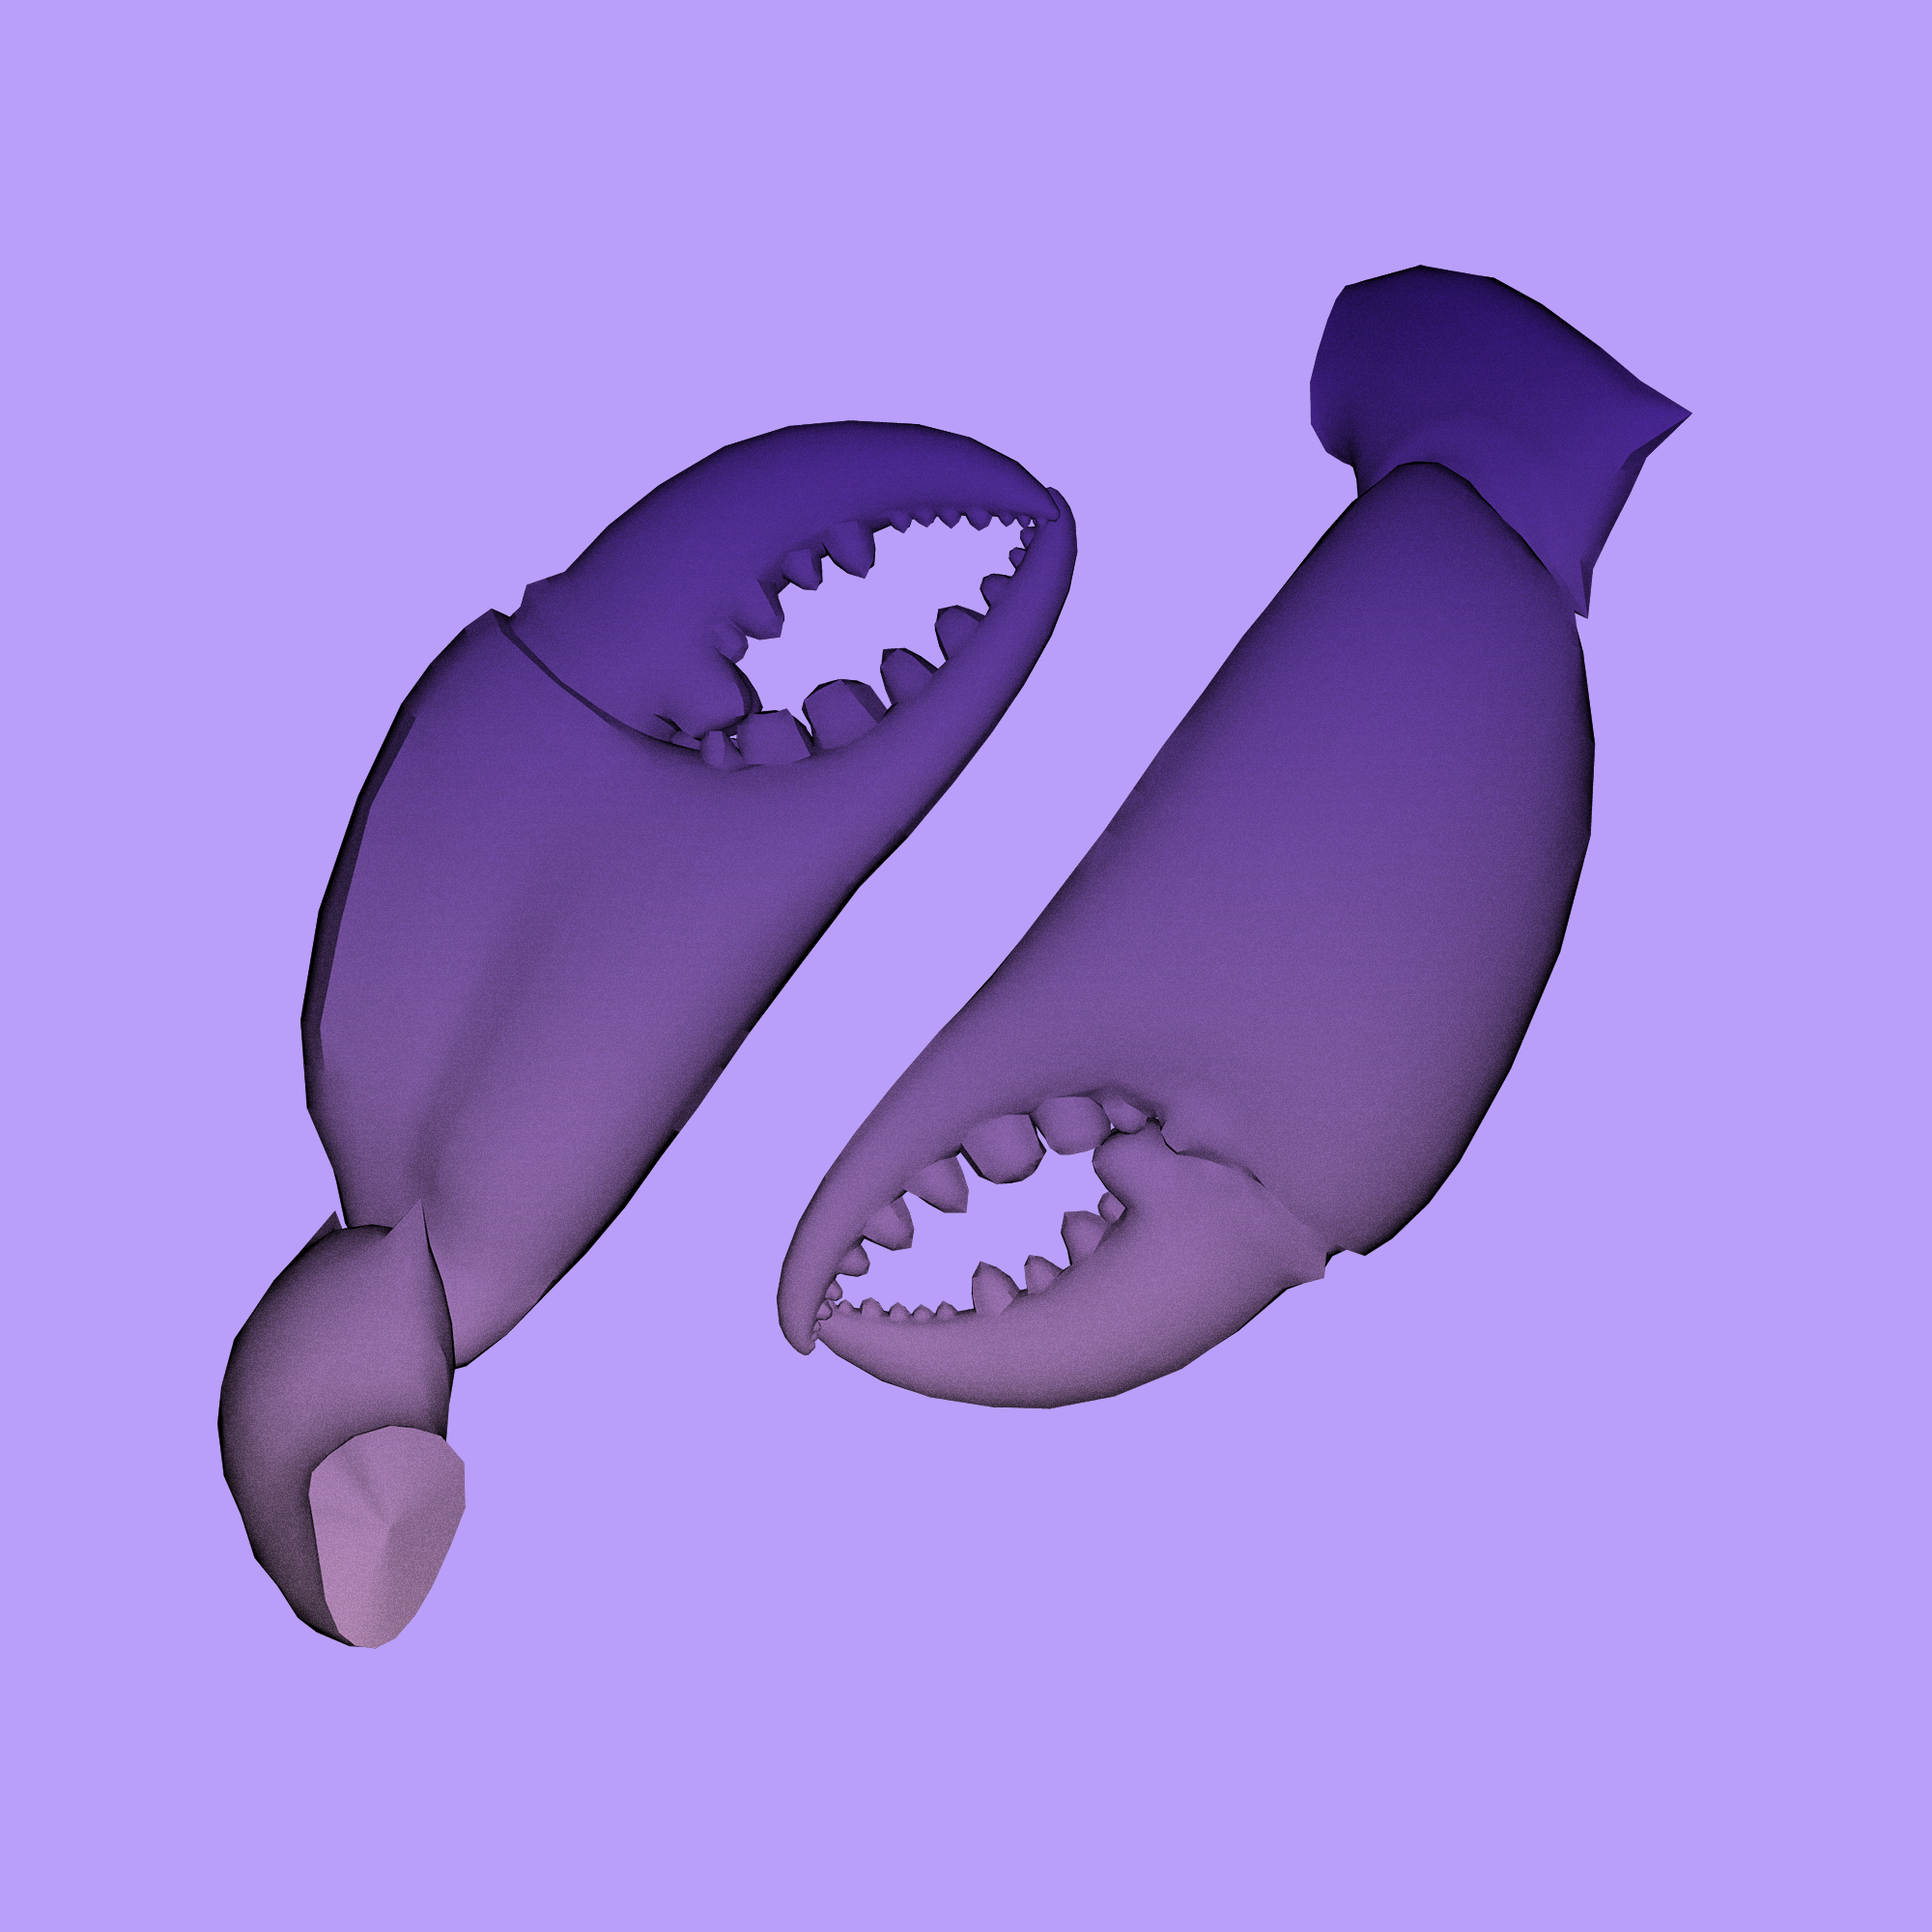

In [133]:
nft_image

In [137]:
clip_model, clip_processor, _ = get_model_info()
nft_image_embedding = get_single_image_embedding(nft_image, clip_processor, clip_model)

In [138]:
nft_image_embedding

array([[ 5.47330618e-01, -1.07489415e-01, -2.60388851e-01,
        -1.86822966e-01, -1.06548090e-02, -4.10661668e-01,
         3.18910927e-01,  3.80583853e-01,  1.02270555e+00,
         2.13932782e-01, -1.69731051e-01,  1.40419275e-01,
        -2.17326060e-01, -5.52633643e-01,  1.30689278e-01,
        -8.34572762e-02,  4.44498450e-01,  6.41221181e-02,
         3.60892117e-02, -8.04246515e-02, -1.04095232e+00,
         1.65246248e-01, -1.50375515e-01, -4.16093886e-01,
        -3.84913608e-02,  3.24333608e-01,  1.65583789e-02,
        -4.11323071e-01, -4.08668131e-01, -1.57281369e-01,
         1.74333274e-01,  2.71929860e-01, -1.71447203e-01,
         2.97350168e-01,  4.56612334e-02, -3.69290799e-01,
         3.72514546e-01, -2.39966422e-01,  3.87824535e-01,
        -1.12708318e+00, -5.23234069e-01,  2.87590027e-01,
         1.55719310e-01, -7.24520922e-01,  3.32377672e-01,
         2.36841649e-01,  2.34021664e-01,  1.55893847e-01,
         4.33256149e-01, -5.06794870e-01, -2.30899751e-0